<a href="https://colab.research.google.com/github/hamagami/ad2025/blob/main/%E6%A8%99%E6%BA%96%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83%E3%81%A8Z%E3%82%B9%E3%82%B3%E3%82%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

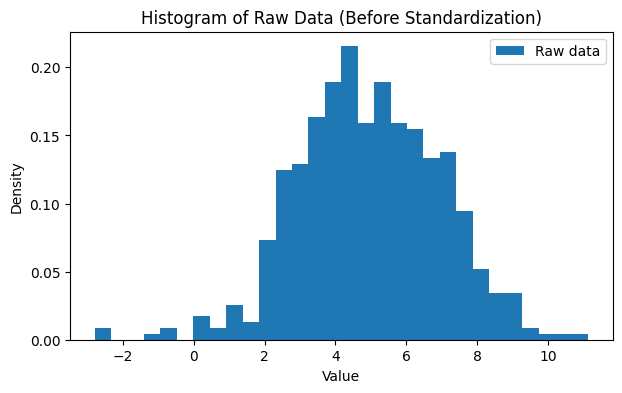

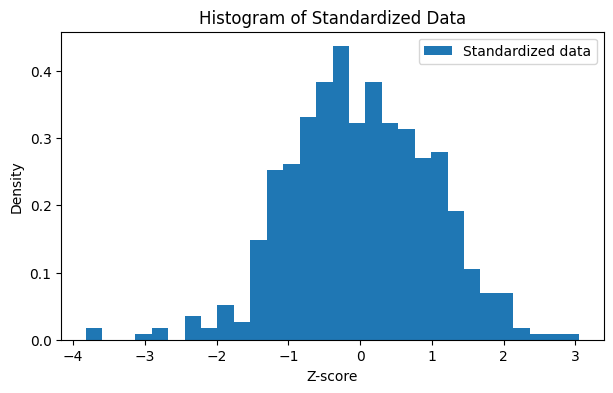

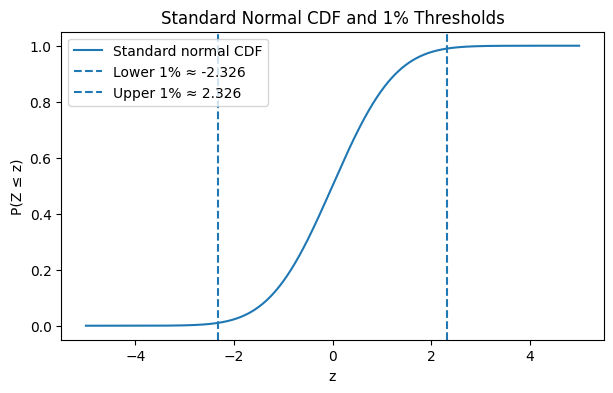

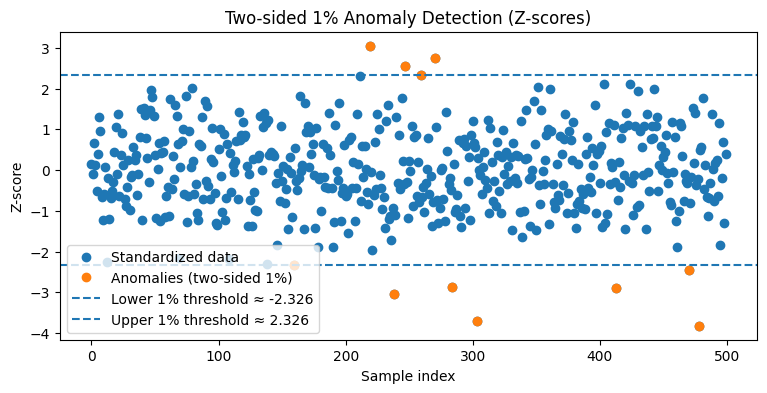

Thresholds: lower 1%≈-2.326348, upper 1%≈2.326348
Detected anomalies: 11 / 500 (lower: 7, upper: 4)
Saved: raw_data.csv, standardized_data.csv, anomalies_1pct_twosided.csv


In [2]:
# Colab-ready: Show raw distribution, standardize, CDF, and two-sided 1% anomaly detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm  # for CDF and quantiles

# ---- 0) Generate 1D normal data ----
rng = np.random.default_rng(0)
x = rng.normal(loc=5.0, scale=2.0, size=500)  # mean=5, std=2, n=500

# ---- 1) Show raw distribution (before standardization) ----
plt.figure(figsize=(7, 4))
plt.hist(x, bins=30, density=True, label="Raw data")
plt.title("Histogram of Raw Data (Before Standardization)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# ---- 2) Standardize (Z-scores) ----
z = (x - x.mean()) / x.std(ddof=0)

# Figure 2: Histogram of standardized data
plt.figure(figsize=(7, 4))
plt.hist(z, bins=30, density=True, label="Standardized data")
plt.title("Histogram of Standardized Data")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.legend()
plt.show()

# ---- 3) Standard normal CDF and 1% thresholds ----
xs = np.linspace(-5, 5, 20001)
cdf = norm.cdf(xs)

# exact 1% / 99% cutoffs (≈ -2.326 / +2.326)
z_low = norm.ppf(0.01)
z_high = norm.ppf(0.99)

# Figure 3: Standard normal CDF with thresholds
plt.figure(figsize=(7, 4))
plt.plot(xs, cdf, label="Standard normal CDF")
plt.axvline(z_low, linestyle="--", label=f"Lower 1% ≈ {z_low:.3f}")
plt.axvline(z_high, linestyle="--", label=f"Upper 1% ≈ {z_high:.3f}")
plt.title("Standard Normal CDF and 1% Thresholds")
plt.xlabel("z")
plt.ylabel("P(Z ≤ z)")
plt.legend()
plt.show()

# ---- 4) Anomaly detection using the two-sided 1% thresholds ----
anomaly_mask = (z <= z_low) | (z >= z_high)
idx = np.arange(len(z))

# Figure 4: Z-scores with thresholds and anomalies highlighted
plt.figure(figsize=(9, 4))
plt.plot(idx, z, marker="o", linestyle="none", label="Standardized data")
plt.plot(idx[anomaly_mask], z[anomaly_mask], marker="o", linestyle="none",
         label="Anomalies (two-sided 1%)")
plt.axhline(z_low, linestyle="--", label=f"Lower 1% threshold ≈ {z_low:.3f}")
plt.axhline(z_high, linestyle="--", label=f"Upper 1% threshold ≈ {z_high:.3f}")
plt.title("Two-sided 1% Anomaly Detection (Z-scores)")
plt.xlabel("Sample index")
plt.ylabel("Z-score")
plt.legend(loc="best")
plt.show()

# ---- Summary and CSV exports ----
anomalies_df = pd.DataFrame({
    "index": idx[anomaly_mask],
    "z_score": z[anomaly_mask]
}).sort_values("index").reset_index(drop=True)

print(f"Thresholds: lower 1%≈{z_low:.6f}, upper 1%≈{z_high:.6f}")
print(f"Detected anomalies: {anomaly_mask.sum()} / {len(z)} "
      f"(lower: {(z <= z_low).sum()}, upper: {(z >= z_high).sum()})")

# Save CSVs
pd.DataFrame({"raw_value": x}).to_csv("raw_data.csv", index=False)
pd.DataFrame({"z_score": z}).to_csv("standardized_data.csv", index=False)
anomalies_df.to_csv("anomalies_1pct_twosided.csv", index=False)
print("Saved: raw_data.csv, standardized_data.csv, anomalies_1pct_twosided.csv")

# (Optional) Download files in Colab:
# from google.colab import files
# files.download("raw_data.csv")
# files.download("standardized_data.csv")
# files.download("anomalies_1pct_twosided.csv")
